# Python Data Visualizations

## This script contains the following points:

1. Import analysis and visualization libraries, and most up-to-date project data.

2. Follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.

3. Create a histogram of the “order_hour_of_day” column with an explanatory markdown cell beneath the histogram describing what the histogram demonstrates.

4. Create a bar chart from the “loyalty_flag” column to assess the distribution of orders among customers in terms of loyalty.

5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day using an accurate sample for the line chart.

6. Create a line chart exploring the connections between age and number of dependents with an explanatory markdown cell below.

7. Create a scatterplot to explore whether there’s a connection between age and spending power (income) using the sns.scatterplot() function with an explanatory markdown cell below.

8. Export visualizations as “.png” files to relevant project folder.

## 1. Import libraries and up-to-date project data

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#Turn project folder path into a string.

path = r'C:\Users\danie\Desktop\CareerFoundry\Achievement 4-Python\11-2023 Instacart Basket Analysis'
path

'C:\\Users\\danie\\Desktop\\CareerFoundry\\Achievement 4-Python\\11-2023 Instacart Basket Analysis'

In [3]:
# Import orders_products_all dataframe from Exercise 4.9.1.

orders_products_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

## 2. Follow instructions in Exercise 4.9 to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.

<Axes: xlabel='orders_day_of_week'>

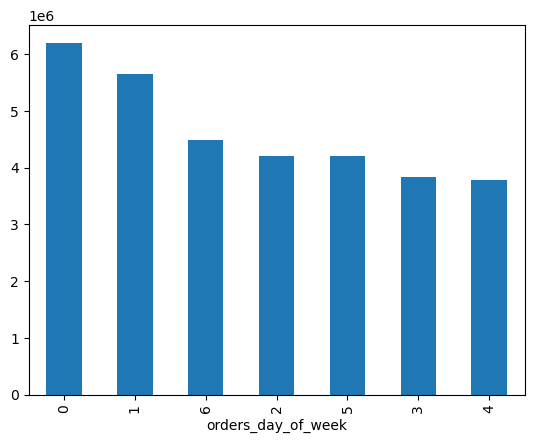

In [4]:
# Create a bar chart.

orders_products_all['orders_day_of_week'].value_counts().plot.bar()

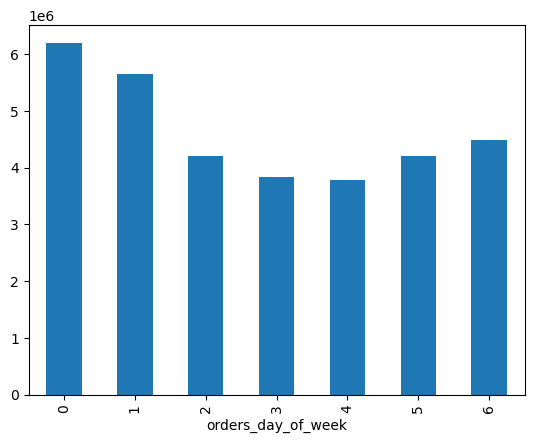

In [5]:
# Change bar chart order based on data index order:

bar = orders_products_all['orders_day_of_week'].value_counts().sort_index().plot.bar()

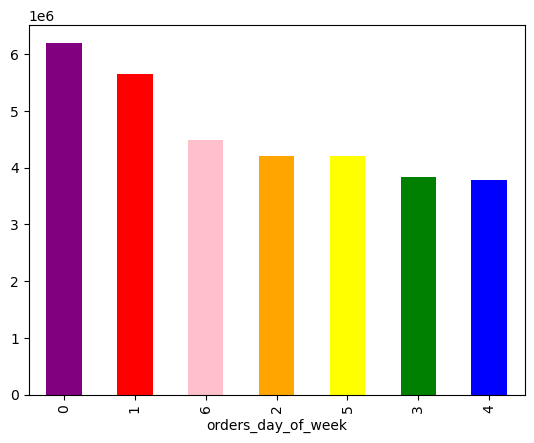

In [6]:
# Bar chart with color argument.

bar = orders_products_all['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

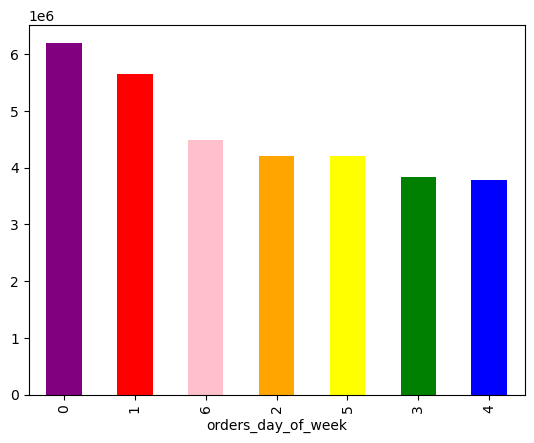

In [7]:
bar.figure

In [8]:
#Export to image file.

bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

<Axes: ylabel='Frequency'>

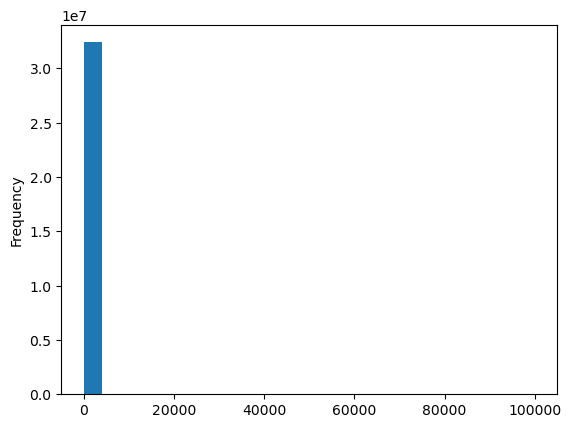

In [9]:
# Create histogram of "prices" column.

orders_products_all['prices'].plot.hist(bins = 25)

In [10]:
# Investigate data error (single bar instead of 25)

orders_products_all['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [11]:
orders_products_all['prices'].mean()

11.980225638383438

In [12]:
orders_products_all['prices'].median()

7.4

In [13]:
orders_products_all['prices'].max()

99999.0

A further investigation with specific checks above yields a maximum price of $99,999. This extreme value forces the histogram to shove all the small values into one bar and the extreme value in another one, indicating data corruption or some kind of special value within the data.

C:\Users\danie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\danie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='prices', ylabel='prices'>

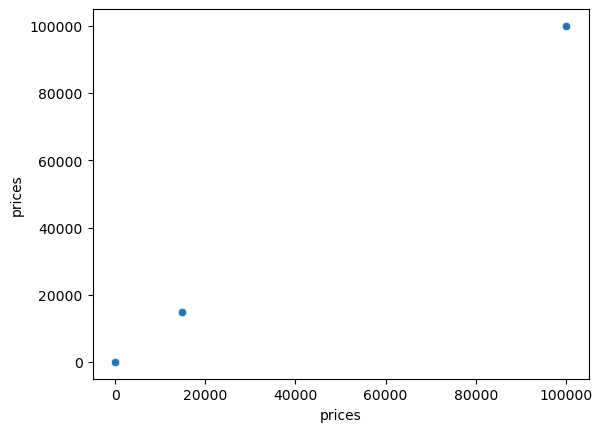

In [16]:
# Create an exploratory scatterplot of "prices" column on itself to to visualize the distribution of data points in order to identify any outliers.

sns.scatterplot(x = 'prices', y = 'prices', data = orders_products_all)

In [17]:
# Check values above certain threshold ($100).

orders_products_all.loc[orders_products_all['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income,_merge
7805,1435153,1519,26,2,11,6.000000,21553,15,0,Lowfat 2% Milkfat Cottage Cheese,...,Craig,Clark,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864,both
7806,1066435,1519,32,3,10,5.000000,21553,28,1,Lowfat 2% Milkfat Cottage Cheese,...,Craig,Clark,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864,both
15143,1697208,2409,33,1,19,5.000000,21553,1,0,Lowfat 2% Milkfat Cottage Cheese,...,Nicole,Odonnell,Female,Hawaii,55,11/11/2018,2,married,230074,both
20264,965345,3531,27,2,19,8.000000,33664,2,0,2 % Reduced Fat Milk,...,Alice,Compton,Female,Hawaii,80,10/6/2019,2,married,233776,both
20497,2943740,3793,1,2,9,11.114836,21553,3,0,Lowfat 2% Milkfat Cottage Cheese,...,Jerry,Allen,Male,Louisiana,59,8/23/2019,3,married,182933,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32303799,3265389,51346,4,1,17,13.000000,33664,2,1,2 % Reduced Fat Milk,...,nan,Gould,Male,Rhode Island,58,1/25/2019,1,married,207497,both
32307882,1179092,131671,12,4,9,15.000000,33664,1,0,2 % Reduced Fat Milk,...,Diana,Hansen,Female,Rhode Island,35,8/4/2018,0,single,86490,both
32310810,1226705,39667,7,2,15,20.000000,33664,14,0,2 % Reduced Fat Milk,...,Johnny,Colon,Male,Rhode Island,78,5/8/2019,2,married,195077,both
32330048,3000037,95105,2,4,19,22.000000,33664,4,0,2 % Reduced Fat Milk,...,Catherine,Browning,Female,South Carolina,48,1/18/2017,2,married,398880,both


In [18]:
# Mark outliers as missing values to prevent skewing data.

orders_products_all.loc[orders_products_all['prices'] >100, 'prices'] = np.nan

In [19]:
# Check new max values.

orders_products_all['prices'].max()

25.0

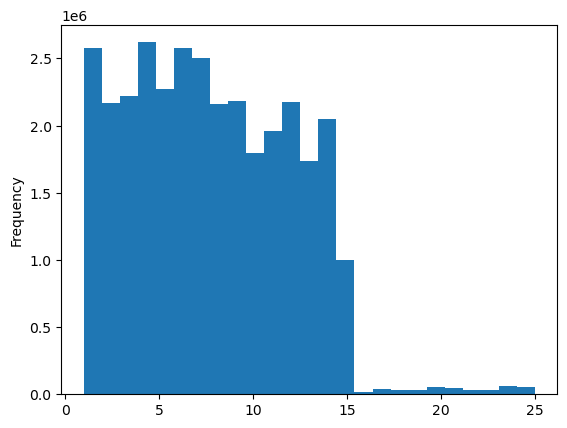

In [20]:
# Recreate histogram without skewed data.

hist = orders_products_all['prices'].plot.hist(bins = 25)

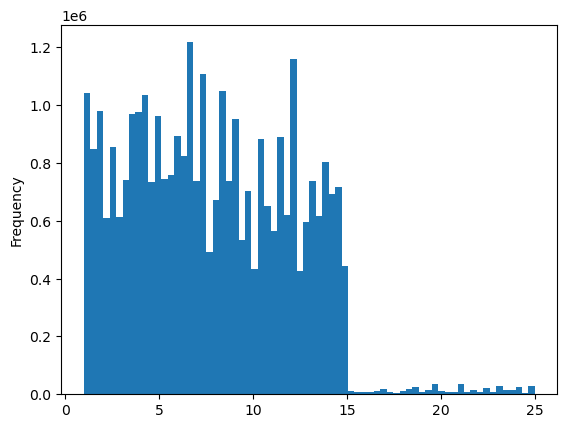

In [21]:
# Create histogram with greater granularity (more bins).

hist_2 = orders_products_all['prices'].plot.hist(bins = 70)

In [22]:
# Set the seed for the random number generator.

np.random.seed(4)

In [23]:
# Create a list holding True/False values to the test np.random.rand() <= 0.7

dev = np.random.rand(len(orders_products_all)) <= 0.7

In [24]:
# Store 70% of data in dataframe big

big = orders_products_all[dev]

In [25]:
# Store 30% of data in datframe small

small = orders_products_all[~dev]

In [26]:
# Check length of ords_prods_merge dataframe.

len(orders_products_all)

32404859

In [27]:
# Check length of big + small to compare.

len(big) + len(small)

32404859

In [28]:
# Reduce sample to only those columns necessary for the chart, namely “prices” and “orders_day_of_week.”

df_2 = small[['orders_day_of_week','prices']]

C:\Users\danie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\danie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\danie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\danie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

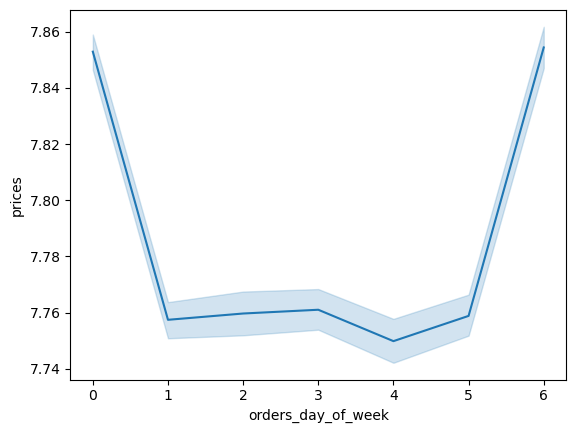

In [29]:
# Create line chart.

line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')

## 3. Create a histogram of the “order_hour_of_day” column.

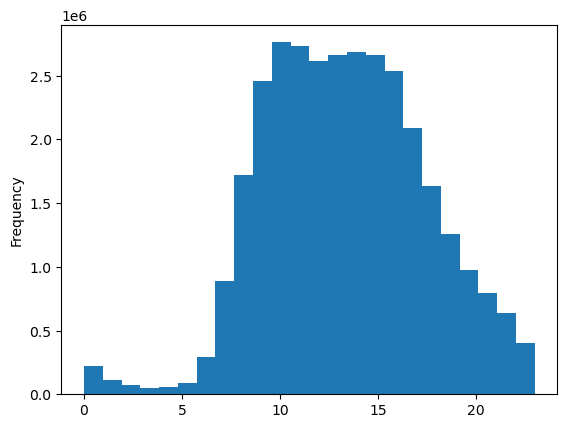

In [45]:
# Create a histogram of the "order_hour_of_day" column. 

hist_ohod = orders_products_all['order_hour_of_day'].plot.hist(bins = 24)

In [37]:
# Check frequency counts of "order_hour_of_day" variable.

orders_products_all['order_hour_of_day'].value_counts(dropna = False)

order_hour_of_day
10    2761760
11    2736140
14    2689136
15    2662144
13    2660954
12    2618532
16    2535202
9     2454203
17    2087654
8     1718118
18    1636502
19    1258305
20     976156
7      891054
21     795637
22     634225
23     402316
6      290493
0      218769
1      115700
5       87961
2       69375
4       53242
3       51281
Name: count, dtype: int64

The above histogram demonstrates that the greatest number of orders are placed between 10:00 and 16:00. Order numbers rise sharply in morning hours beginning at 6:00 and drop off from 16:00 to 23:00.

## 4. Create a bar chart from the “loyalty_flag” column to assess the distribution of orders among customers in terms of loyalty.

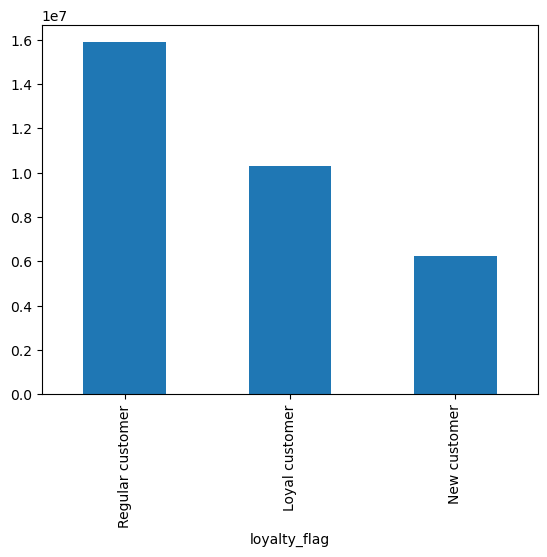

In [46]:
# Create a bar chart from "loyalty_flag" column.

bar_loyalty_flag = orders_products_all['loyalty_flag'].value_counts().plot.bar()

## 5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day using an accurate sample for the line chart.

In [39]:
# Reduce small sample to necessary columns for line chart, i.e. "prices" and "order_hour_of_day".

df_3 = small[['order_hour_of_day','prices']]

C:\Users\danie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\danie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\danie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\danie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

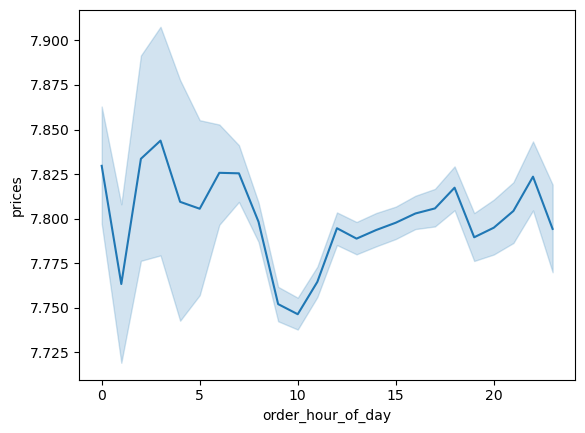

In [51]:
# Create line chart using small sample to assess "prices" and "order_hour_of_day" variables.

line = sns.lineplot(data = df_3, x = 'order_hour_of_day', y = 'prices')

## 6. Create a line chart exploring the connections between age and number of dependents with an explanatory markdown cell below.

In [41]:
# Reduce small sample to necessary columns for line chart, i.e. "age" and "n_dependants".

df_4 = small[['age','n_dependants']]

C:\Users\danie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\danie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\danie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\danie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

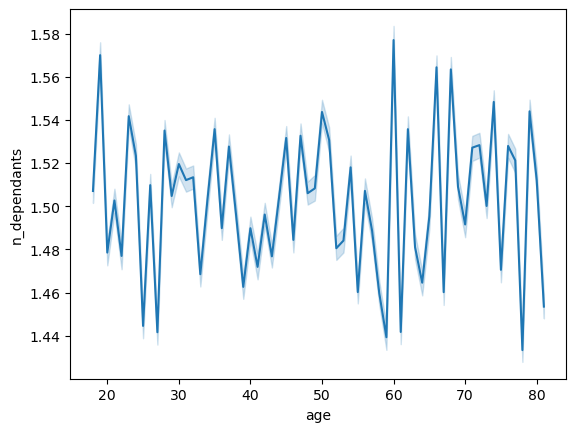

In [50]:
# Create line chart using small sample to assess connections between age and number of dependants.

line_age_nd = sns.lineplot(data = df_4, x = 'age', y = 'n_dependants')

The line chart above indicates that there is little to no correlation between a customer's age and the number of dependants.

## 7. Create a scatterplot to explore whether there’s a connection between age and spending power (income) using the sns.scatterplot() function.

C:\Users\danie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\danie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


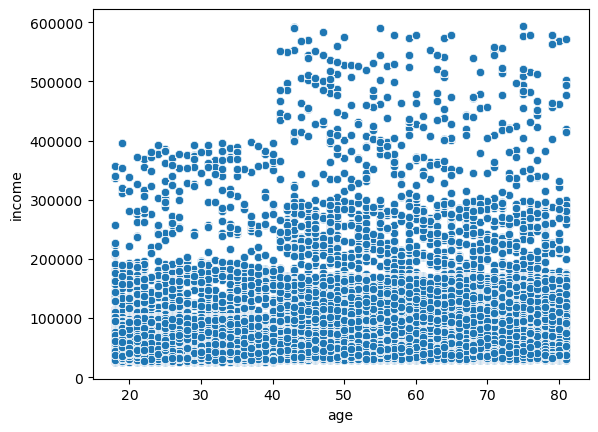

In [52]:
# Create explatory scatterplot of age and income using the sns.scatterplot() function.

scatter_age_income = sns.scatterplot(x = 'age', y = 'income', data = orders_products_all)

The above scatterplot shows that customers ages 40 and older have the highest incomes, while customers younger than 40 have lower incomes. Customers younger than 40 mostly have incomes of 20000 and below, with outliers up to 400000. Customers older than 40 mostly have incomes that range from 0 to 30000, with outliers as high as 600000.

## 8. Export visualizations as “.png” files to relevant project folder.

In [47]:
# Export order hour of day histogram to image file.

hist_ohod.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_ohod.png'))

In [48]:
# Export loyalty_flag bar chart to image file.

bar_loyalty_flag.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

In [49]:
# Export prices/order_hour_of_day line chart to image file.

line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_ohod.png'))

In [54]:
# Export age/number of dependants line chart to image file.

line_age_nd.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_nd.png'))

In [55]:
# Export scatterplot of age and income to image file.

scatter_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_income.png'))